### Image Quantization

Normal RGB image representation (with 8 bit depth per channel) yields more than 16 millions combinations (different colours). Is that many really necessary? Let's have a look.

In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

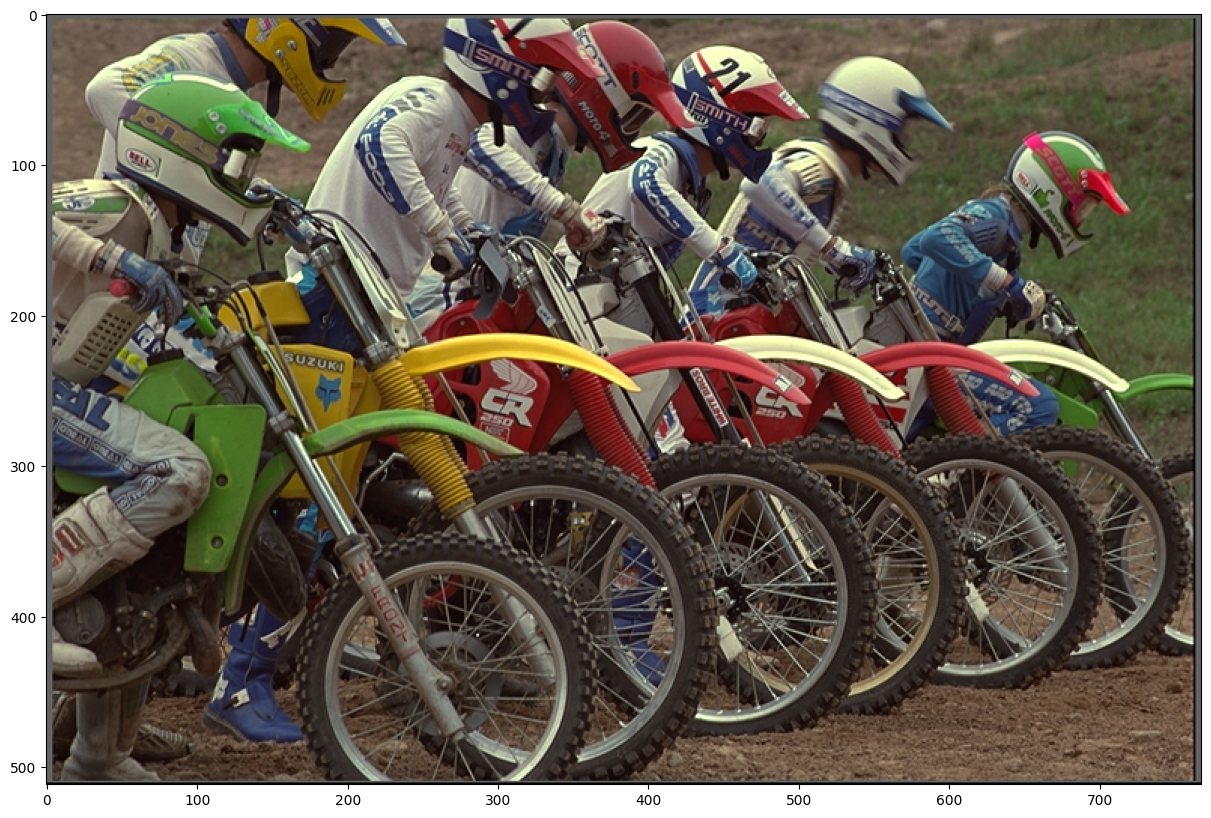

In [2]:
img = cv2.imread('data/kodim05.png') # kodim02
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

Let us now count the different colours in the picture.

In [4]:
from tqdm import tqdm

rows, cols, channels = img.shape
colors = []

for r in tqdm(range(rows)):
    for c in range(cols):
        pixel = list(img[r, c, :])
        if pixel not in colors:
            colors.append(pixel)
            
print(rows*cols, len(colors))

100%|██████████| 512/512 [01:41<00:00,  5.03it/s]


NameError: name 'color' is not defined

In [6]:
print(rows*cols, len(colors))
img.shape

393216 63558


(512, 768, 3)

In [7]:
# Let's count the different colours in a clever way :-)
pixels = np.reshape(img, (-1, 3))
# pixels = np.reshape(img, (512*768, 3))
pixels = [tuple(p) for p in pixels]
print('Number of pixels', rows*cols, len(pixels))

Number of pixels 393216 393216


In [8]:
from collections import Counter
colors = Counter(pixels)
colors

Counter({(np.uint8(99), np.uint8(99), np.uint8(99)): 2968,
         (np.uint8(34), np.uint8(24), np.uint8(22)): 874,
         (np.uint8(35), np.uint8(25), np.uint8(24)): 851,
         (np.uint8(0), np.uint8(0), np.uint8(0)): 768,
         (np.uint8(37), np.uint8(27), np.uint8(25)): 733,
         (np.uint8(33), np.uint8(23), np.uint8(21)): 705,
         (np.uint8(44), np.uint8(37), np.uint8(34)): 704,
         (np.uint8(46), np.uint8(39), np.uint8(36)): 701,
         (np.uint8(38), np.uint8(28), np.uint8(26)): 672,
         (np.uint8(47), np.uint8(40), np.uint8(37)): 658,
         (np.uint8(97), np.uint8(97), np.uint8(97)): 634,
         (np.uint8(43), np.uint8(36), np.uint8(33)): 615,
         (np.uint8(42), np.uint8(35), np.uint8(32)): 598,
         (np.uint8(39), np.uint8(30), np.uint8(28)): 593,
         (np.uint8(48), np.uint8(41), np.uint8(39)): 549,
         (np.uint8(31), np.uint8(21), np.uint8(20)): 547,
         (np.uint8(50), np.uint8(43), np.uint8(40)): 535,
         (np.uin

In [9]:
print('Number of pixels', rows*cols)
print('Number of colors', len(colors))
print('Ratio of colors ', len(colors)/2**24)

Number of pixels 393216
Number of colors 63558
Ratio of colors  0.0037883520126342773


### Uniform Quantization

Instead of using 255 (8 bits) different levels for **each** of the colour channels, let's use a coarser resolution, e.g., [0, 4, 8, 12, ...]

Quantized image is 16 times smaller.
Original color palette: 16777216
Quantized color palette: 1048576


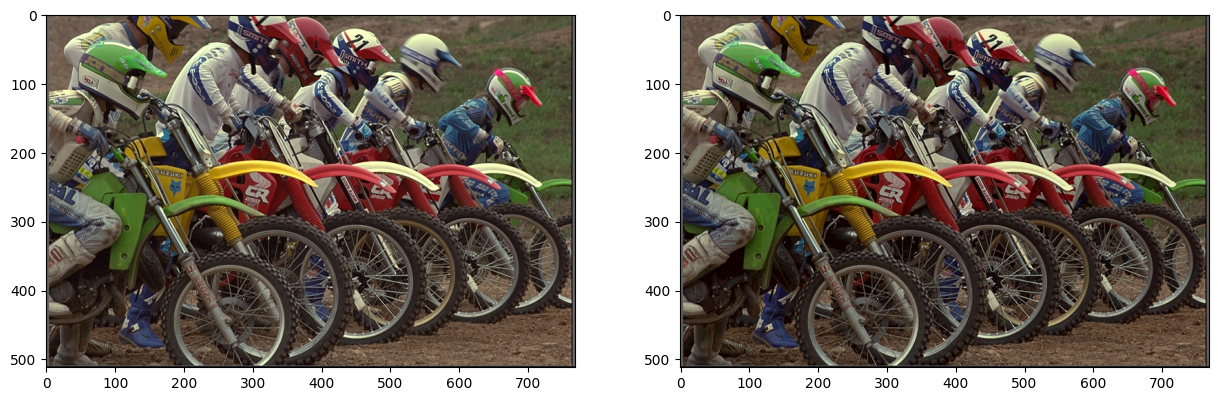

In [12]:
quantized = np.copy(img)
step = 16

# Since we know for loops are slow in python, let's make use of numpy power :-)
quantized = (np.floor(quantized/step)*step).astype(np.uint8)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(quantized)

print('Quantized image is', step, 'times smaller.')
print('Original color palette:', 2**24)
print('Quantized color palette:', (2**24)//step)

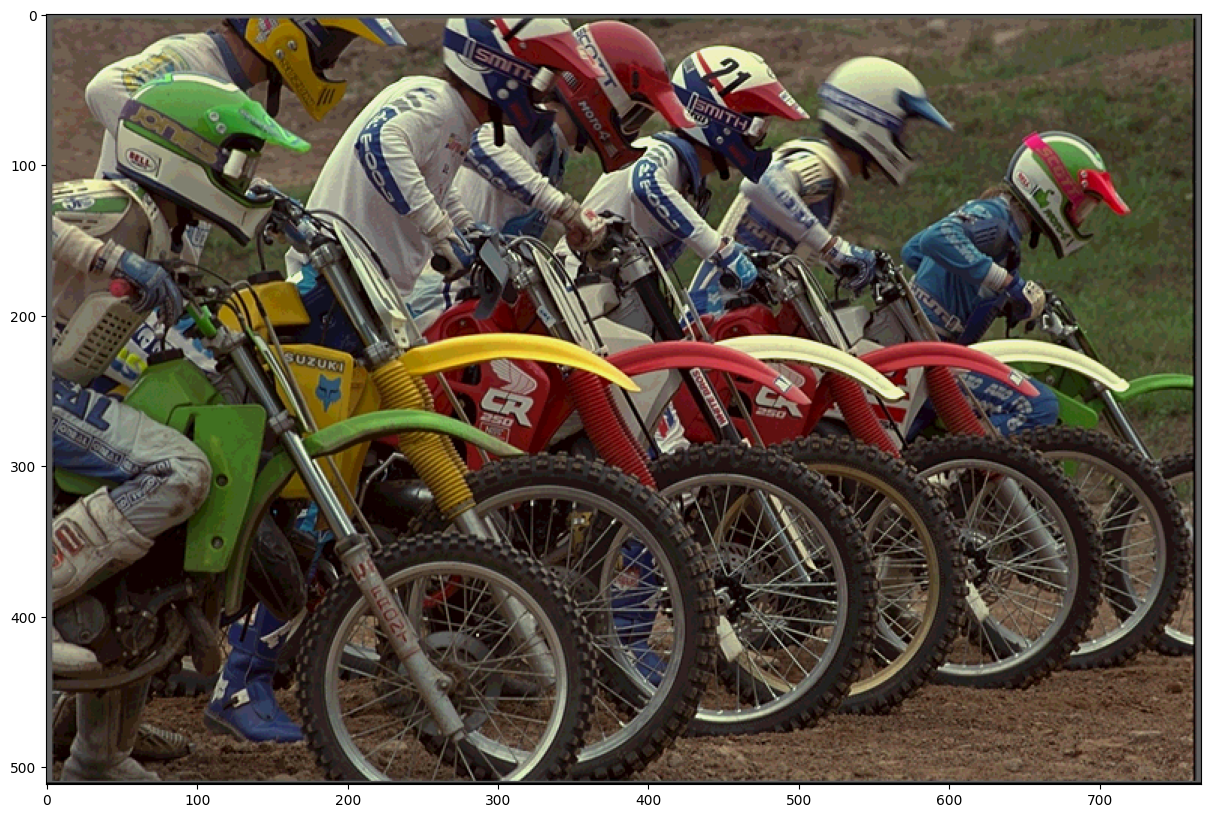

In [11]:
plt.imshow(quantized)